In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv("heart.csv") 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
df.duplicated().sum()

1

In [64]:
df.drop_duplicates(inplace=True)

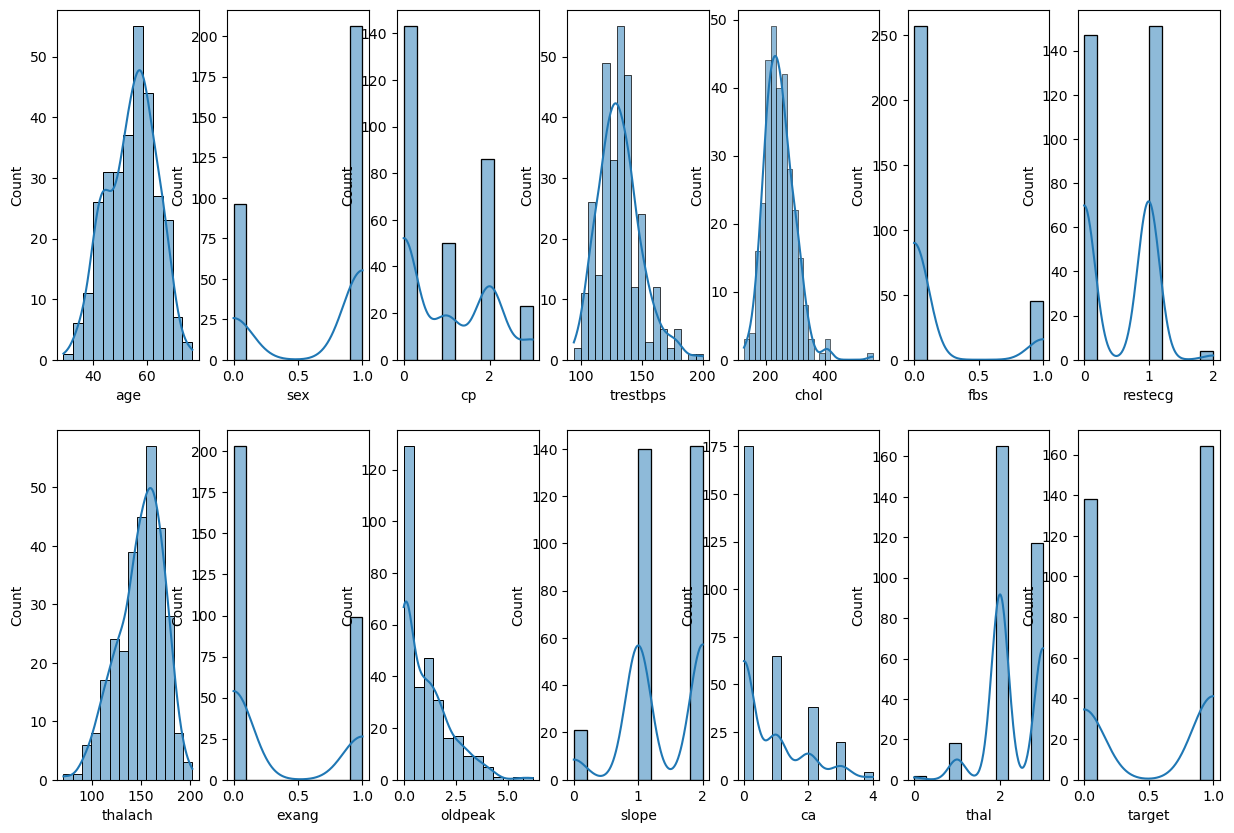

In [65]:
## exploratory analysis
plt.figure(figsize=(15,10))
plt_number=1
for i in df.columns:
    plt.subplot(2,7,plt_number)
    sns.histplot(x=df[i],kde=True)
    plt_number+=1

<Axes: xlabel='sex', ylabel='age'>

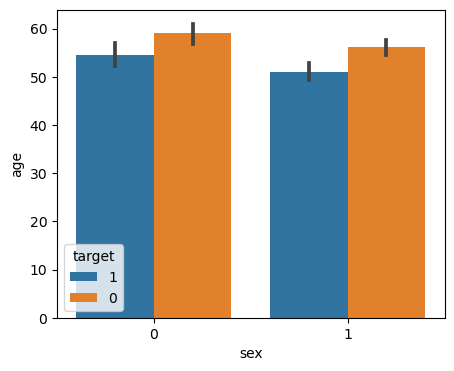

In [66]:
plt.figure(figsize =(5,4))
sns.barplot(x=df["sex"],y=df["age"],hue=df["target"].astype(str))

In [67]:
df.groupby(["sex","target"])["age"].mean()

sex  target
0    0         59.041667
     1         54.555556
1    0         56.087719
     1         51.043478
Name: age, dtype: float64

In [68]:
##preprocessing
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
x=df.iloc[:,:-1]
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
scaled=mm.fit_transform(x)
X=pd.DataFrame(scaled,columns=df.columns[:-1])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
298,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
299,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
300,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [70]:
##checking multicolinearity
res=X[X.columns].corr() ##checks the colinearity only for the independent feature  
res

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090


In [71]:
res[res>0.8]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
thalach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


<Axes: >

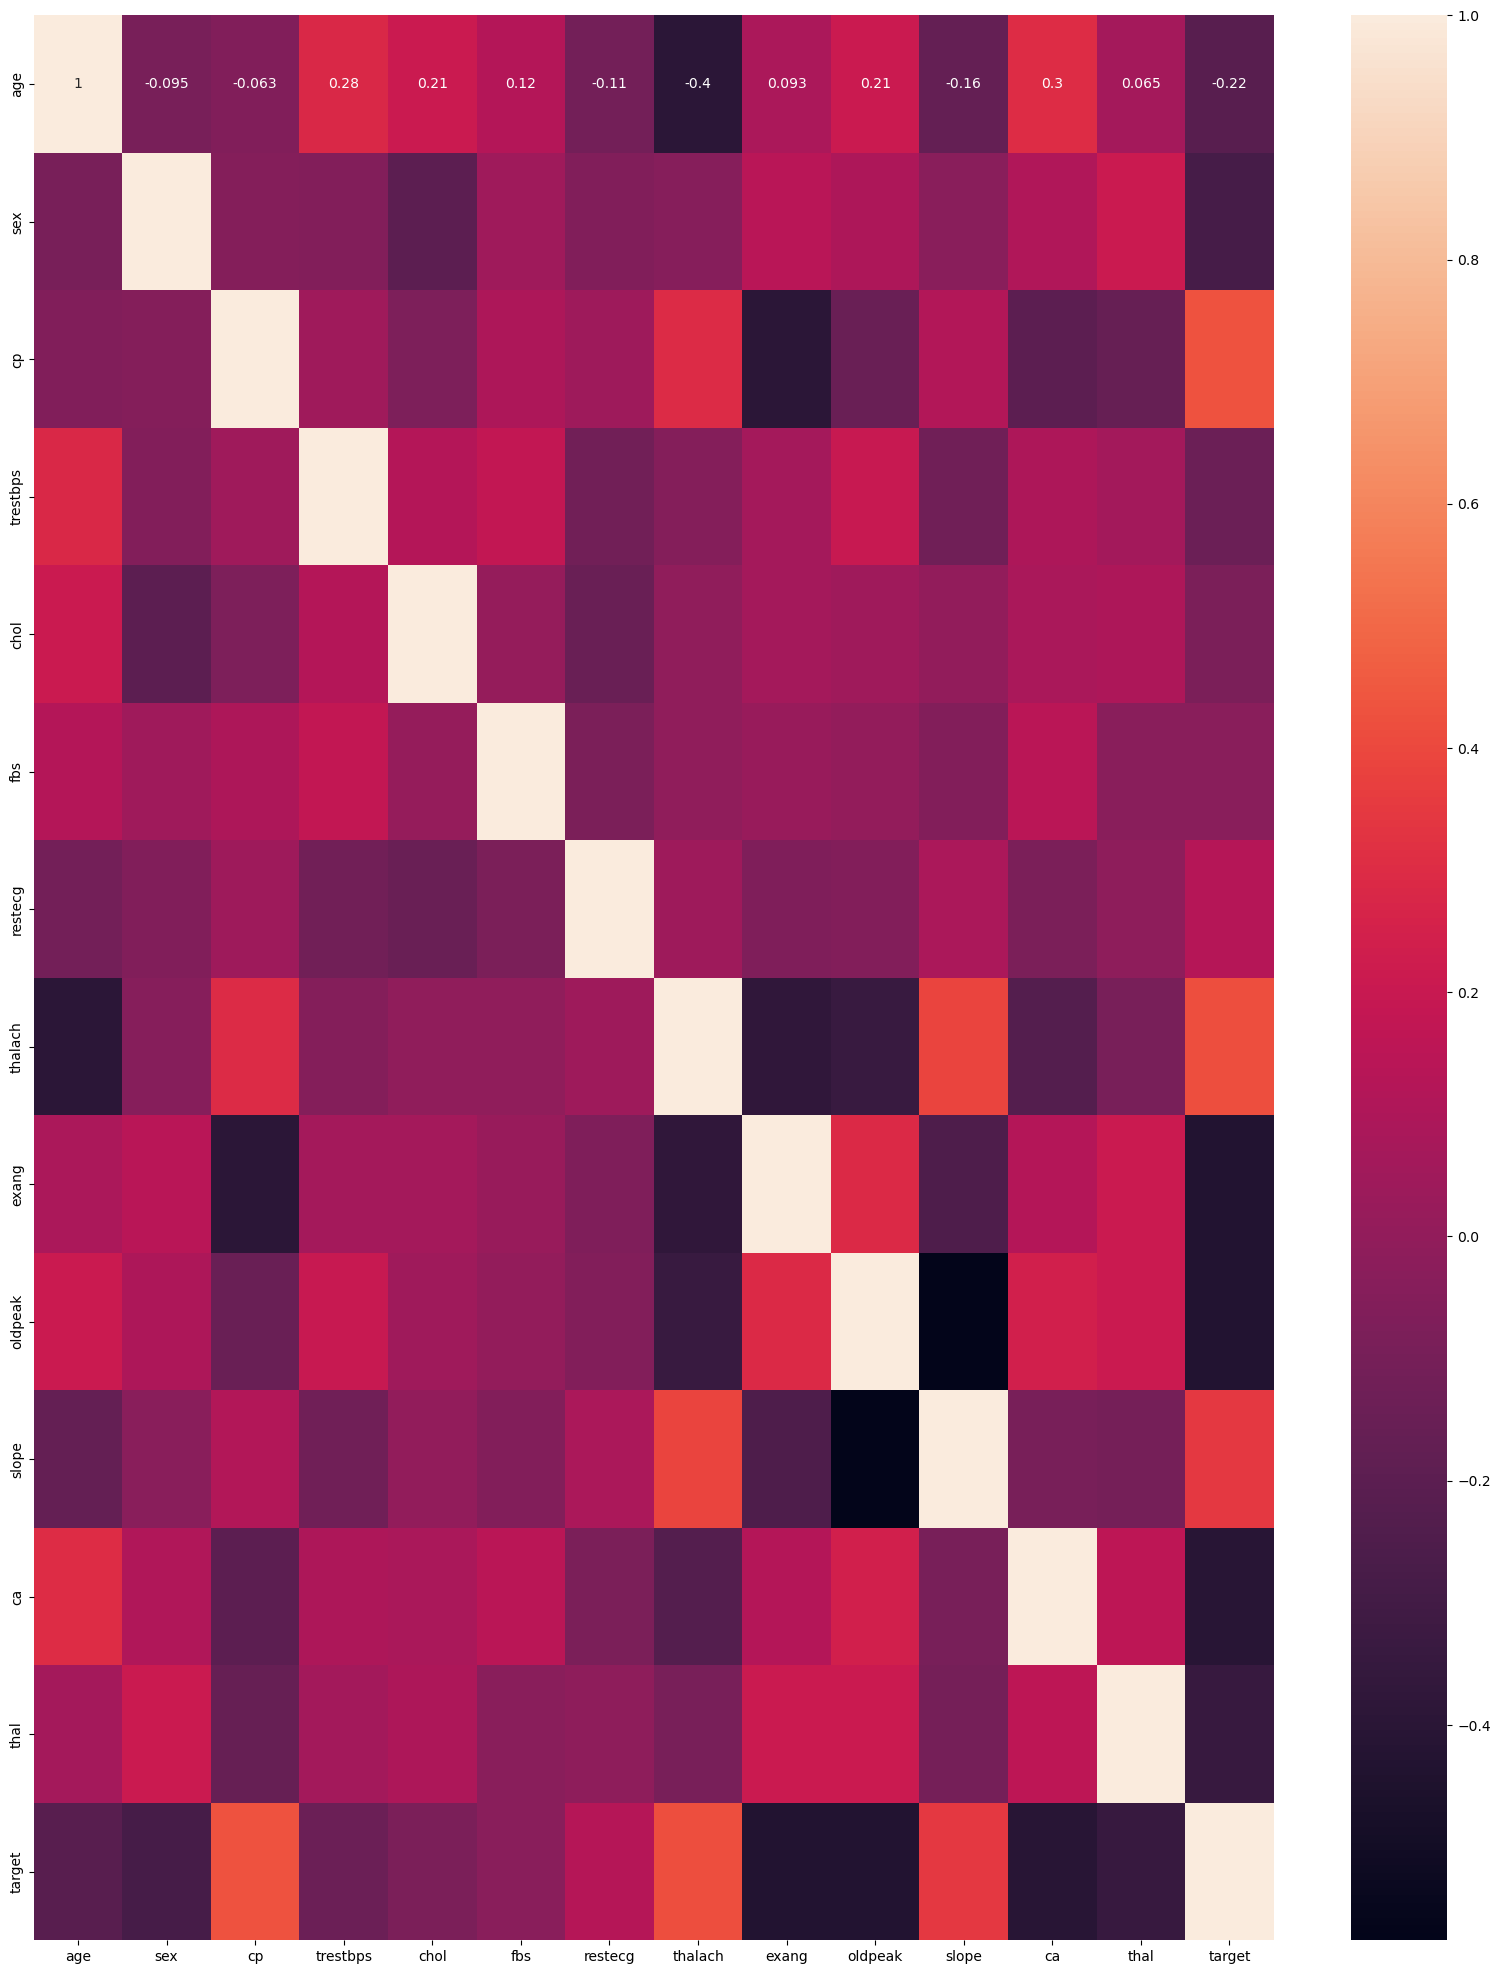

In [72]:
X["target"]=df["target"]
##checking correlation after normalizing
plt.figure(figsize=(20,25))
sns.heatmap(X.corr(),annot=True)


In [73]:
#creating independent and dependent variables
X=X.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
298,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
299,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
300,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [74]:
y=df["target"]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import *
model=DecisionTreeClassifier(random_state=42,criterion="gini",splitter="best",max_depth=4)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [77]:
acc=accuracy_score(y_test,y_pred)
acc

0.8157894736842105

In [78]:
a=classification_report(y_test,y_pred)
print(a)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.85      0.80      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [79]:
y_train.value_counts()

target
1    123
0    103
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import GridSearchCV
params={
    "criterion":("gini","entropy"),#quality of split
    "splitter":("best","random"),# searches the feature for a split
    "max_depth":(list(range(1,10))),#depth of tree range from 1 to 19
    "min_samples_split":[2,3,4,5,6,7],#the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1,10))#minimum number of sample required to be at a leaf node 
    #we are passing list range from 1 to 10
}

In [81]:
tree_clf = DecisionTreeClassifier() ## object creating for decision tree
tree_cv = GridSearchCV(tree_clf,params,scoring="accuracy",n_jobs=-1,verbose=5,cv=5) 
## n_jobs -1 == inorder to provide hardware support for handling combinations
##verbose = combination statements based on cv
tree_cv.fit(X_train,y_train)##training data on gridsearch cv
best_params=tree_cv.best_params_##it will give you best parameter 
print(f"Bestparameter:{best_params}")

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Bestparameter:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 6, 'splitter': 'random'}


In [82]:
dt1=DecisionTreeClassifier(**best_params,random_state=42)
dt1.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8157894736842105

In [98]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
rf_clf= RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)
accuracy_score(y_test,y_predict)

0.8552631578947368

<Axes: >

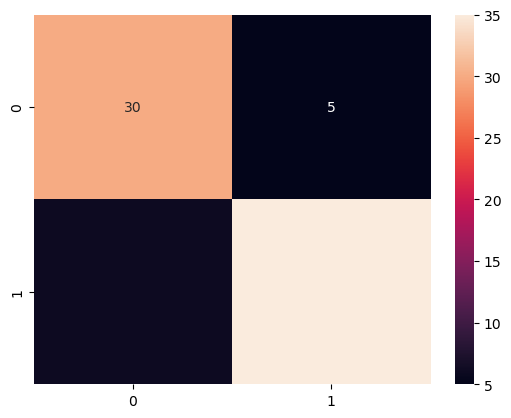

In [99]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot = True)

In [100]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



In [101]:
from sklearn.model_selection import GridSearchCV
random_grid={"n_estimators":[100,150,200,250,300],"max_features":["auto","sqrt","log2"],
             "max_depth":[10,20,30],"min_samples_split":[5,10],"min_samples_leaf":[2,4]}
rf_clf1= RandomForestClassifier(random_state=17)
rf_cv=GridSearchCV(estimator=rf_clf1,scoring="f1",param_grid=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_cv.fit(X_train,y_train)
rf_best_params=rf_cv.best_params_
print(f"Best_params:{rf_best_params}")

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best_params:{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [102]:
rf_clf2=RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200)

In [104]:
y_pred1=rf_clf2.predict(X_test)
acc=accuracy_score(y_test,y_pred1)
acc

0.8552631578947368

In [105]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier 
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [107]:
y_gbm=gbm.predict(X_test)
print(accuracy_score(y_test,y_gbm))

0.8157894736842105


In [119]:
param_grid={
    "learning_rate" : [0.01,0.03,0.06,0.1,0.4,0.5,0.6,0.7],
    "max_depth":[5,6,7,8,9,10],
    "n_estimators":[50,65,80,100]
}
GB= GradientBoostingClassifier(random_state=87)
rcv=GridSearchCV(estimator=GB,scoring="accuracy",param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)
cv_best_params=rcv.best_params_
print(f"best params:{cv_best_params}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
best params:{'learning_rate': 0.7, 'max_depth': 6, 'n_estimators': 50}


In [120]:
gb_clf=GradientBoostingClassifier(**cv_best_params)
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=6, n_estimators=50)

In [121]:
y_predgb=gb_clf.predict(X_test)
acc=accuracy_score(y_test,y_predgb)
acc

0.8421052631578947

In [128]:
#XGBOOST
from xgboost import XGBClassifier 
xgb=XGBClassifier(random_state=87)
xgb.fit(X_train,y_train)
y_hat=xgb.predict(X_test)

In [129]:
print(accuracy_score(y_test,y_hat))

0.7894736842105263


In [130]:
param_grid={
    "gamma" :[0,0.1,0.2,0.4],"learning_rate":[0.01,0.03,0.06,0.1],"max_depth":[5,6,7,8,9],"n_estimators":[50,65,80],"alpha":[0,0.1,0.5,1],"lambda":[0.1,0.5,0.2,0.3]}
XGB=XGBClassifier(random_state=87)
rcv=GridSearchCV(estimator=XGB,scoring="accuracy",param_grid=param_grid,cv=3,verbose=1,n_jobs=-1)
rcv.fit(X_train,y_train)
xgb_best_params=rcv.best_params_
print(f"best params:{xgb_best_params}")

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
best params:{'alpha': 0.1, 'gamma': 0.1, 'lambda': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


In [132]:
xgb_clf=XGBClassifier(**xgb_best_params)
xgb_clf.fit(X_train,y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.2, learning_rate=0.1,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, ...)

In [133]:
y_pre=xgb_clf.predict(X_test)
acc=accuracy_score(y_test,y_pre)
acc

0.8289473684210527